Shape: (200, 5)
CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates: 0
CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object
              Age  Annual Income  Spending Score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000


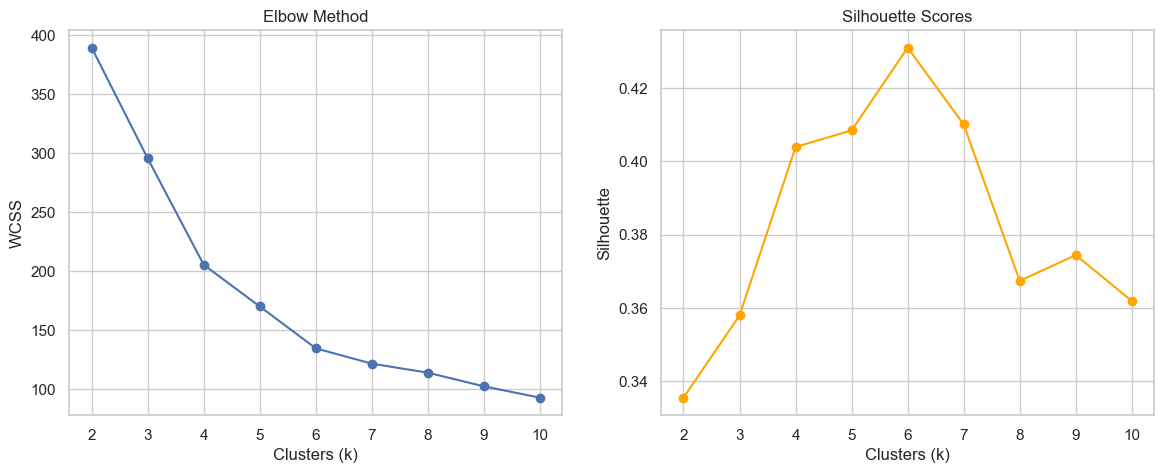

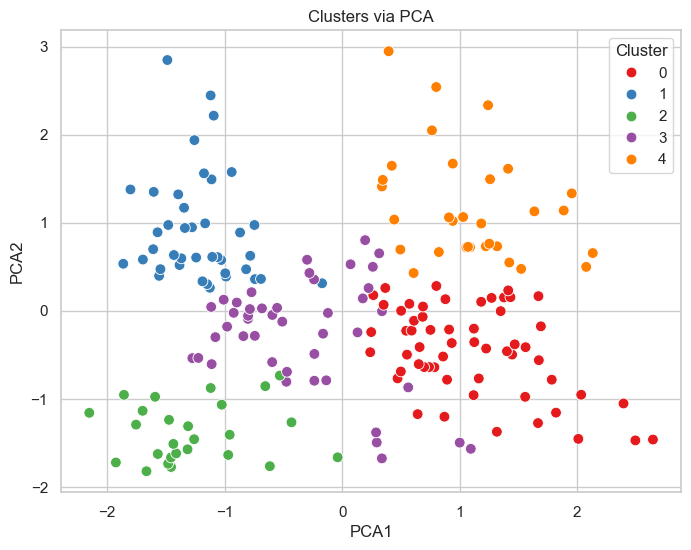

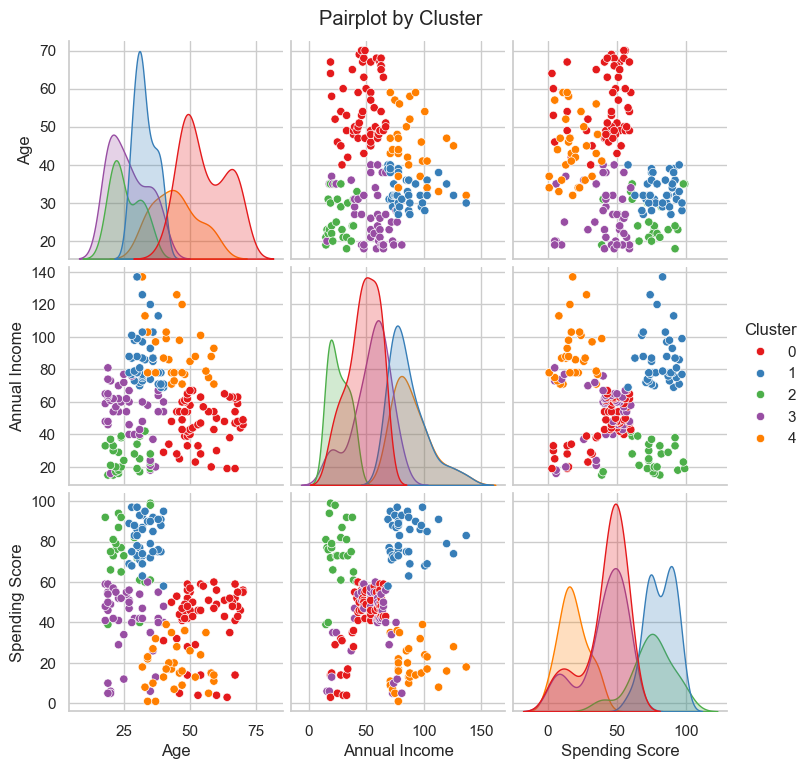


Centroids:
         Age  Annual Income  Spending Score  Cluster
0  55.275862      47.620690       41.706897        0
1  32.875000      86.100000       81.525000        1
2  25.769231      26.115385       74.846154        2
3  26.733333      54.311111       40.911111        3
4  44.387097      89.774194       18.483871        4

Saved clustered data to 'mall_customers_clustered.csv'

Cluster 0 Summary:
  Avg Age: 55.3
  Avg Income: 47.6k$
  Avg Spending Score: 41.7
  → Lower spenders: consider entry-level deals or incentive promos.

Cluster 1 Summary:
  Avg Age: 32.9
  Avg Income: 86.1k$
  Avg Spending Score: 81.5
  → High spenders: target with premium offers and loyalty rewards.

Cluster 2 Summary:
  Avg Age: 25.8
  Avg Income: 26.1k$
  Avg Spending Score: 74.8
  → High spenders: target with premium offers and loyalty rewards.

Cluster 3 Summary:
  Avg Age: 26.7
  Avg Income: 54.3k$
  Avg Spending Score: 40.9
  → Lower spenders: consider entry-level deals or incentive promos.

Cluster

In [12]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

# Step 2: Load dataset
url = "https://www.dmi.unict.it/ortis/StatsLab/mall/Mall_Customers.csv"
data = pd.read_csv(url)
data.columns = ['CustomerID','Gender','Age','Annual Income','Spending Score']
print("Shape:", data.shape)
print(data.isnull().sum())
print("Duplicates:", data.duplicated().sum())
print(data.dtypes)
print(data[['Age','Annual Income','Spending Score']].describe())

# Step 3: Preprocess data
X = data[['Age','Annual Income','Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine optimal clusters
wcss, sil_scores = [], []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters (k)")
plt.ylabel("WCSS")
plt.subplot(1,2,2)
plt.plot(range(2,11), sil_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Clusters (k)")
plt.ylabel("Silhouette")
plt.show()

# Step 5: Apply KMeans (e.g., k=5)
k = 5
km = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = km.fit_predict(X_scaled)

# Step 6: PCA visualization
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
data['PCA1'], data['PCA2'] = pcs[:,0], pcs[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster',
                palette='Set1', data=data, s=60)
plt.title("Clusters via PCA")
plt.show()

# Step 7: Pairplot by cluster
sns.pairplot(data, vars=['Age','Annual Income','Spending Score'],
             hue='Cluster', palette='Set1')
plt.suptitle("Pairplot by Cluster", y=1.02)
plt.show()

# Step 8: Centroids in original scale
centroids = scaler.inverse_transform(km.cluster_centers_)
cent_df = pd.DataFrame(centroids, columns=['Age','Annual Income','Spending Score'])
cent_df['Cluster'] = cent_df.index
print("\nCentroids:")
print(cent_df)

# Step 9: Save results
data.to_csv("mall_customers_clustered.csv", index=False)
print("\nSaved clustered data to 'mall_customers_clustered.csv'")

# Step 10: Recommendations
for _, row in cent_df.iterrows():
    cid = int(row['Cluster'])
    print(f"\nCluster {cid} Summary:")
    print(f"  Avg Age: {row['Age']:.1f}")
    print(f"  Avg Income: {row['Annual Income']:.1f}k$")
    print(f"  Avg Spending Score: {row['Spending Score']:.1f}")
    if row['Spending Score'] > cent_df['Spending Score'].mean():
        print("  → High spenders: target with premium offers and loyalty rewards.")
    else:
        print("  → Lower spenders: consider entry-level deals or incentive promos.")
